look into spicy similarity vectors !

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('steam_game_data.csv')

In [3]:
df.head()

,Unnamed: 0,title,hyperlink,is game,Genres,main_genre,sub_genre,price_in_rand,discount_price,discount_percent,...,tags,developer,publisher,game description,release_year,release_month,release_day,percent_of_reviews_positive,number_of_reviews,category
0,0,Counter-Strike: Global Offensive,https://store.steampowered.com/app/730/Counter...,All Games > Free to Play Games > Counter-Strik...,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.0,0.0,0,...,"['FPS', 'Shooter', 'Multiplayer', 'Competitive...",Valve,Valve,About This Game Counter-Strike: Global Offensi...,2012,Aug,21,88,6545979,Games
1,1,Apex Legends™,https://store.steampowered.com/app/1172470/Ape...,All Games > Action Games > Apex Legends Offici...,"['Action,', 'Adventure,', 'Free', 'to', 'Play']",Action,Adventure,0.0,0.0,0,...,"['Free to Play', 'Multiplayer', 'Battle Royale...",Respawn Entertainment,Electronic Arts,About This Game Conquer with character in Apex...,2020,Nov,4,86,486153,Games
2,2,Stray,https://store.steampowered.com/app/1332010/Str...,All Games > Adventure Games > Annapurna Intera...,"['Adventure,', 'Indie']",Adventure,Indie,195.0,195.0,0,...,"['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At...",BlueTwelve Studio,Annapurna Interactive,"About This Game Lost, alone and separated from...",2022,Jul,19,97,56406,Games
3,3,Grand Theft Auto V,https://store.steampowered.com/app/271590/Gran...,All Games > Action Games > Grand Theft Auto V,"['Action,', 'Adventure']",Action,Adventure,0.0,0.0,0,...,"['Open World', 'Action', 'Multiplayer', 'Autom...",Rockstar North,Rockstar Games,"About This Game When a young street hustler, a...",2015,Apr,13,85,1251157,Games
4,4,MultiVersus,https://store.steampowered.com/app/1818750/Mul...,All Games > Free to Play Games > MultiVersus,"['Action,', 'Free', 'to', 'Play']",Action,Free to play,0.0,0.0,0,...,"['Multiplayer', 'Co-op', '2D Fighter', 'Action...",Player First Games,Warner Bros. Games,About This Game CharactersChoose from Harley Q...,2022,Jul,19,89,42353,Games


In [4]:
df = df[['title', 'tags']]
df.head()

,title,tags
0,Counter-Strike: Global Offensive,"['FPS', 'Shooter', 'Multiplayer', 'Competitive..."
1,Apex Legends™,"['Free to Play', 'Multiplayer', 'Battle Royale..."
2,Stray,"['Cats', 'Adventure', 'Cyberpunk', 'Cute', 'At..."
3,Grand Theft Auto V,"['Open World', 'Action', 'Multiplayer', 'Autom..."
4,MultiVersus,"['Multiplayer', 'Co-op', '2D Fighter', 'Action..."


In [5]:
def clean(string):
    return string.replace('[','').replace(']','').replace("'",'')

In [6]:
df['tags'] = df['tags'].apply(clean)

In [7]:
df

,title,tags
0,Counter-Strike: Global Offensive,"FPS, Shooter, Multiplayer, Competitive, Action..."
1,Apex Legends™,"Free to Play, Multiplayer, Battle Royale, Shoo..."
2,Stray,"Cats, Adventure, Cyberpunk, Cute, Atmospheric,..."
3,Grand Theft Auto V,"Open World, Action, Multiplayer, Automobile Si..."
4,MultiVersus,"Multiplayer, Co-op, 2D Fighter, Action, Compet..."
...,...,...
77806,Rising Islands - Art Book,"Adventure, Indie"
77807,Atrius Star,"Action, Roguelite, Roguelike, Artificial Intel..."
77808,Jigsaw Puzzle Pack - Pixel Puzzles Ultimate: T...,"Indie, Casual, Simulation, Strategy, Action, S..."
77809,Jigsaw Puzzle Pack - Pixel Puzzles Ultimate: M...,"Indie, Casual, Simulation, Sports, Strategy, F..."


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

In [10]:
# nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def Lemming_tokenizer(str_input):
    words = str_input.lower().split(',')
    words = [lemmatizer.lemmatize(word.strip()) for word in words]
    return words

In [11]:
vectorizer = TfidfVectorizer(tokenizer=Lemming_tokenizer,ngram_range=(1,2),max_features=100)

In [12]:
# vectorizer?

In [13]:
test = df[:10000]

In [14]:
X = vectorizer.fit_transform(test.tags).toarray()

In [15]:
X.shape

(10000, 100)

In [16]:
some = vectorizer.get_feature_names()

In [17]:
some

['2d',
 '3d',
 'action',
 'action adventure',
 'action rpg',
 'action-adventure',
 'adventure',
 'anime',
 'arcade',
 'atmospheric',
 'base building',
 'building',
 'cartoony',
 'casual',
 'character customization',
 'choices matter',
 'classic',
 'co-op',
 'colorful',
 'combat',
 'comedy',
 'controller',
 'crafting',
 'cute',
 'dark',
 'difficult',
 'early access',
 'exploration',
 'family friendly',
 'fantasy',
 'female protagonist',
 'first-person',
 'fps',
 'free to play',
 'funny',
 'gore',
 'great soundtrack',
 'hack and slash',
 'historical',
 'horror',
 'indie',
 'isometric',
 'jrpg',
 'local co-op',
 'local multiplayer',
 'management',
 'massively multiplayer',
 'mature',
 'medieval',
 'military',
 'moddable',
 'multiplayer',
 'multiple endings',
 'mystery',
 'nudity',
 'online co-op',
 'open world',
 'physic',
 'pixel graphics',
 'platformer',
 'point & click',
 'procedural generation',
 'psychological horror',
 'puzzle',
 'pvp',
 'racing',
 'realistic',
 'relaxing',
 'replay

In [18]:
from sys import getsizeof

# size in  bytes
getsizeof(X)

8000112

In [19]:
from sklearn.decomposition import PCA

In [20]:
pca = PCA()
pca.fit(X)
pca.explained_variance_ratio_

array([0.06489333, 0.04818016, 0.04126558, 0.03842083, 0.03170025,
       0.02979182, 0.02786934, 0.02409666, 0.02326439, 0.02266121,
       0.02105727, 0.02018396, 0.01864688, 0.0178977 , 0.01696165,
       0.01614738, 0.01534957, 0.01442728, 0.01390851, 0.0132598 ,
       0.01292249, 0.01200161, 0.01171622, 0.01147933, 0.01101412,
       0.01095854, 0.01056583, 0.00997931, 0.00970299, 0.00940803,
       0.00908713, 0.00892698, 0.00860836, 0.00821814, 0.00817423,
       0.0079804 , 0.00789827, 0.00772818, 0.00741729, 0.00728485,
       0.00718496, 0.00695336, 0.00687136, 0.00686462, 0.0067718 ,
       0.00669012, 0.00652107, 0.00644961, 0.00623712, 0.0062027 ,
       0.00606508, 0.00595818, 0.00588733, 0.0058129 , 0.00578869,
       0.00571302, 0.00562595, 0.00554639, 0.00551812, 0.00550613,
       0.00536503, 0.00524887, 0.00519593, 0.00518499, 0.00509138,
       0.00503832, 0.00491386, 0.00486783, 0.00482524, 0.00476548,
       0.00468694, 0.00466058, 0.00457286, 0.00456669, 0.00450

In [21]:
pca_len = len(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative Explained Variance')

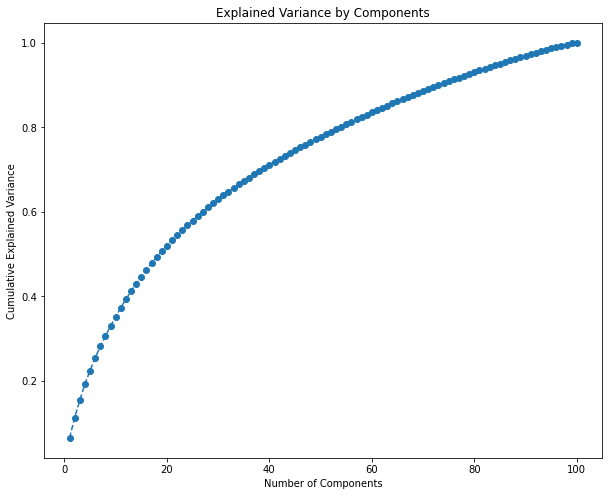

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,8))
plt.plot(range(1,pca_len+1),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

### How to determine the optimal K

These methods are:

- The Elbow Method
- The Silhouette Method

### The Elbow Method
This is probably the most well-known method for determining the optimal number of clusters. 

Calculate the Within-Cluster-Sum of Squared Errors (WSS) for different values of k, and choose the k for which WSS becomes first starts to diminish. In the plot of WSS-versus-k, this is visible as an elbow.

Within-Cluster-Sum of Squared Errors sounds a bit complex. Let’s break it down:

- The Squared Error for each point is the square of the distance of the point from its representation i.e. its predicted cluster center.
- The WSS score is the sum of these Squared Errors for all the points.
- Any distance metric like the Euclidean Distance or the Manhattan Distance can be used.
Let us implement this in Python using the sklearn library and our own function for calculating WSS for a range of values for k.

In [23]:
from sklearn.cluster import KMeans


# function returns WSS score for k values from 1 to kmax
def calculate_WSS(points, kmax):
    sse = []
    for k in range(1, kmax+1):
        kmeans = KMeans(n_clusters=k,random_state=1).fit(points)
        centroids = kmeans.cluster_centers_
        pred_clusters = kmeans.predict(points)
        curr_sse = kmeans.inertia_

#         # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
#         for i in range(len(points)):
#             curr_center = centroids[pred_clusters[i]]
#             curr_sse += (points[i, 0] - curr_center[0]) ** 2 + \
#                 (points[i, 1] - curr_center[1]) ** 2

        sse.append((curr_sse,k))
        df = pd.DataFrame(sse, columns=['WSS', 'K'])
    return df

In [24]:
%%time
wss = calculate_WSS(X, 50)
# wss

Wall time: 1min 23s


,WSS,K
0,8707.952659,1
1,8302.697874,2
2,8032.716437,3
3,7810.238915,4
4,7603.269051,5
5,7431.983923,6
6,7293.948344,7
7,7162.071168,8
8,6996.170058,9
9,6858.057822,10


In [25]:
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

<AxesSubplot:xlabel='K', ylabel='WSS'>

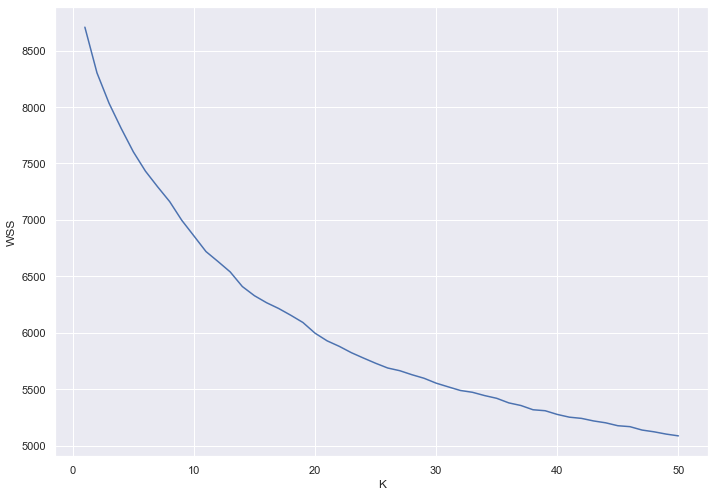

In [26]:
sns.lineplot(data=wss, x='K',y='WSS')

## The Silhouette Method


The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.

The Silhouette Value s(i) for each data point i is defined as follows:


Source: Wikipedia
Note: s(i) is defined to be equal to zero if i is the only point in the cluster. This is to prevent the number of clusters from increasing significantly with many single-point clusters.

Here, a(i) is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.


Source: Wikipedia
Similarly, b(i) is the measure of dissimilarity of i from points in other clusters.


Source: Wikipedia
d(i, j) is the distance between points i and j. Generally, Euclidean Distance is used as the distance metric.

The Silhouette score can be easily calculated in Python using the metrics module of the sklearn library.

In [30]:
from sklearn.metrics import silhouette_score

sil = []
kmax = 100

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
    kmeans = KMeans(n_clusters=k).fit(X)
    labels = kmeans.labels_
    sil.append((silhouette_score(X, labels, metric='euclidean'), k))
    
ss = pd.DataFrame(sil, columns=['Silhouette Score', 'K'])

A high Silhouette Score is desirable. The Silhouette Score reaches its global maximum at the optimal k. This should ideally appear as a peak in the Silhouette Value-versus-k plot.

<AxesSubplot:xlabel='K', ylabel='Silhouette Score'>

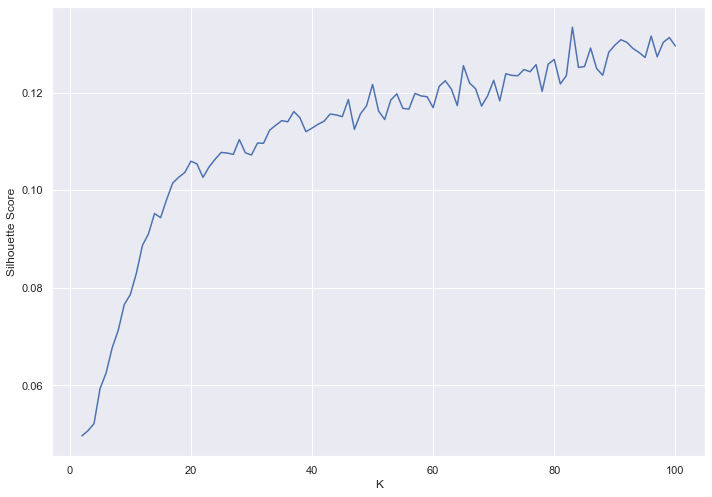

In [31]:
sns.lineplot(data=ss, x='K',y='Silhouette Score')

In [34]:
ss.max()

Silhouette Score      0.133397
K                   100.000000
dtype: float64

End Notes
The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. Thus, it can be used in combination with the Elbow Method.

Therefore, the Elbow Method and the Silhouette Method are not alternatives to each other for finding the optimal K. Rather they are tools to be used together for a more confident decision.

In [ ]:
Stop

In [35]:
%%time
kmeans = KMeans(random_state=1,n_clusters=100,verbose=0)
cluster = kmeans.fit_predict(X)

Wall time: 7.03 s


In [36]:
test['cluster'] = cluster

<ipython-input-36-d9507acaccc0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['cluster'] = cluster


In [37]:
test

,title,tags,cluster
0,Counter-Strike: Global Offensive,"FPS, Shooter, Multiplayer, Competitive, Action...",81
1,Apex Legends™,"Free to Play, Multiplayer, Battle Royale, Shoo...",38
2,Stray,"Cats, Adventure, Cyberpunk, Cute, Atmospheric,...",86
3,Grand Theft Auto V,"Open World, Action, Multiplayer, Automobile Si...",95
4,MultiVersus,"Multiplayer, Co-op, 2D Fighter, Action, Compet...",33
...,...,...,...
9995,Serious Fun Football,"Early Access, Football, Soccer, Singleplayer, ...",18
9996,Doctor Who: The Edge Of Time,"Adventure, VR, Sci-fi, Horror, Puzzle, Singlep...",69
9997,Train Simulator: Clinchfield Railroad: Elkhorn...,Simulation,9
9998,Artists Of Fortune: Paint By Numbers!,"Free to Play, Relaxing, Pixel Graphics, Casual...",1


In [38]:
test[test['cluster']==81].head(20)

,title,tags,cluster
0,Counter-Strike: Global Offensive,"FPS, Shooter, Multiplayer, Competitive, Action...",81
10,War Thunder,"Free to Play, Vehicular Combat, Combat, VR, Wo...",81
42,World of Warships,"Naval Combat, Free to Play, Naval, World War I...",81
60,Battlefield V,"FPS, World War II, Shooter, Multiplayer, Singl...",81
61,Chivalry 2,"Medieval, Multiplayer, Action, Swordplay, Comb...",81
82,ACE COMBAT™ 7: SKIES UNKNOWN,"Flight, Jet, Military, War, Shooter, Arcade, C...",81
87,Hell Let Loose,"Action, Shooter, FPS, World War II, Multiplaye...",81
106,Squad,"Military, Realistic, FPS, Multiplayer, Team-Ba...",81
118,Battlefield 1 ™,"FPS, Multiplayer, World War I, War, Shooter, S...",81
128,Battlefield™ 2042,"Shooter, Multiplayer, Action, FPS, War, Milita...",81


In [ ]:
cs = test[test['cluster']==8]